In [1]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
# Set dataset Directory
Generated_Dataset_dir = 'outputs/Generated'
# Set dataset Directory
Original_Dataset_dir = 'inputs/Tuberculosis'


### Generated Images Visualization

In [19]:
img_shape=(64,64)
batch_size=16
# Get image paths from dataset directory
img_paths = [os.path.join(Generated_Dataset_dir, img) for img in os.listdir(Generated_Dataset_dir)]


In [20]:
def preprocess_image(img_path, img_shape):
    """
    Preprocesses an image by loading it, converting it to a grayscale array,
    and normalizing pixel values to the range [0, 1].

    Parameters:
    - img_path (str): Path to the image file.
    - img_shape (tuple): Target size of the image (default is (224, 224)).

    Returns:
    - img_array (numpy.ndarray): Preprocessed image as a NumPy array.
    """
    # Load the image
    img = load_img(img_path, color_mode='grayscale', target_size=img_shape)

    # Convert the image to a NumPy array
    img_array = img_to_array(img)

    # Normalize pixel values to the range [0, 1]
    img_array /= 255.0

    return img_array

In [21]:
def create_tf_dataset(img_paths, batch_size, img_shape):
    """
    Creates a TensorFlow dataset from a list of image paths.

    Parameters:
    - img_paths (list): List of file paths to the images.
    - batch_size (int): Batch size for the dataset (default is 16).
    - img_shape (tuple): Target size of the images (default is (224, 224)).

    Returns:
    - dataset (tf.data.Dataset): Configured TensorFlow dataset.
    """
    # Create a TensorFlow Dataset from image paths
    dataset = tf.data.Dataset.from_tensor_slices(img_paths)

    # Map the preprocess_image function to each element in the dataset
    dataset = dataset.map(lambda x: tf.numpy_function(preprocess_image, [x, img_shape], tf.float32))

    # Specify batch size and shuffle
    dataset = dataset.shuffle(len(img_paths)).batch(batch_size)

    # Adjust the shape of the elements in the dataset
    dataset = dataset.map(lambda x: tf.reshape(x, (-1,) + img_shape + (1,)))

    # Prefetch for better performance
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset


In [22]:
Generated_Dataset= create_tf_dataset(img_paths, batch_size, img_shape)

In [23]:
# Visualize a batch of images
def visualize_batch(dataset):
    """
    Visualizes a batch of images from a TensorFlow dataset.

    Parameters:
    - dataset (tf.data.Dataset): TensorFlow dataset containing images.

    Returns:
    None
    """
    # Get a batch of images
    img_batch = next(iter(dataset))

    # Plot the images
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(5, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(img_batch[i].numpy().squeeze(), cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

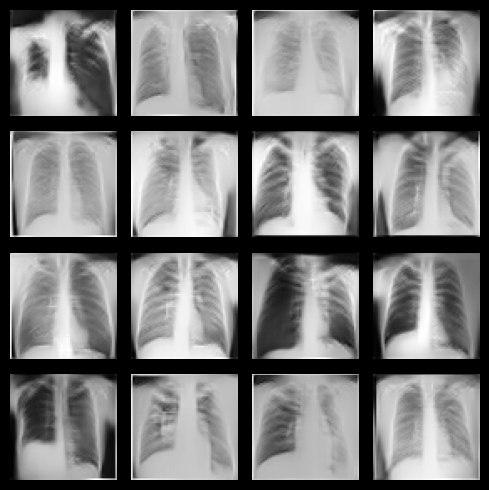

In [24]:
# Visualize a batch of images
visualize_batch(Generated_Dataset)

In [25]:
# Get image paths from dataset directory
img_paths = [os.path.join(Original_Dataset_dir, img) for img in os.listdir(Original_Dataset_dir)]

In [26]:
Original_Dataset= create_tf_dataset(img_paths, batch_size, img_shape)

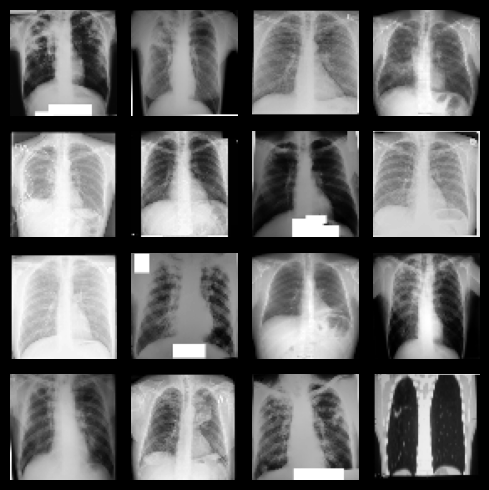

In [27]:
# Visualize a batch of images
visualize_batch(Original_Dataset)